In [1]:
%matplotlib inline

In [72]:
import GHRGbuild
import networkx as nx
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt
n = 3**9
n_levels = 3
groups_per_level = 3
c_bar = 50
snr = 10

D_actual=GHRGbuild.createAsymGHRG(n,snr,c_bar,n_levels,groups_per_level)

Hierarchy Level:  0 | KS Detectable:  True | Link Probabilities in / out per block:  0.004812343623939227 0.001404222944927201
[[0.00481234 0.00140422 0.00140422]
 [0.00140422 0.00481234 0.00140422]
 [0.00140422 0.00140422 0.00481234]]
Hierarchy Level:  1 | KS Detectable:  True | Link Probabilities in / out per block:  0.01022890030331314 0.0021040652842522697
[[0.0102289  0.00210407 0.00210407]
 [0.00210407 0.0102289  0.00210407]
 [0.00210407 0.00210407 0.0102289 ]]
Hierarchy Level:  2 | KS Detectable:  True | Link Probabilities in / out per block:  0.023906820861859683 0.003389940024039868
[[0.02390682 0.00338994 0.00338994]
 [0.00338994 0.02390682 0.00338994]
 [0.00338994 0.00338994 0.02390682]]


Are the Omega matrices correct as is?!

In [73]:
#### print D_actual.node[0]
# first level split
print 3**8*0.001778*2 + 3**8*0.004 # ~50
# second level split
print 3**8*0.001778*2 + 3**7*0.00239*2 + 3**7*0.0074 
# third level split
print 3**8*0.001778*2 + 3**7*0.0023945*2 + +3**6*0.0035006*2 + 3**6*0.0152098 

49.574916
49.968576
49.996278


The average degree of nodes at first level (should be about 50) -- so the Omega matrix appears to be correct.  
Lets print the full dendrogram -- ordering was inversed. Fixed now!

In [74]:
for node in D_actual.nodes():
    print D_actual.node[node]

{'level': 0, 'n': 19683, 'nnodes': array([    0,     1,     2, ..., 19680, 19681, 19682]), 'Nr': array([[       0., 43046721., 43046721.],
       [       0.,        0., 43046721.],
       [       0.,        0.,        0.]]), 'children': [1, 2, 3], 'Er': array([[    0.        , 60447.19333208, 60447.19333208],
       [    0.        ,     0.        , 60447.19333208],
       [    0.        ,     0.        ,     0.        ]])}
{'level': 1, 'n': 6561, 'nnodes': array([   0,    1,    2, ..., 6558, 6559, 6560]), 'Nr': array([[21520080.]]), 'children': [], 'Er': array([[103562.01977466]])}
{'level': 1, 'n': 6561, 'nnodes': array([ 6561,  6562,  6563, ..., 13119, 13120, 13121]), 'Nr': array([[21520080.]]), 'children': [], 'Er': array([[103562.01977466]])}
{'level': 1, 'n': 6561, 'nnodes': array([13122, 13123, 13124, ..., 19680, 19681, 19682]), 'Nr': array([[      0., 4782969., 4782969.],
       [      0.,       0., 4782969.],
       [      0.,       0.,       0.]]), 'children': [4, 5, 6], 'Er':

Dendrogram looks mostly correct. Some quick checks

In [75]:
# last level should be Nr and Er
print 729*(729-1)/2
print 729*(729-1)/2 * 0.0152

265356.0
4033.4112


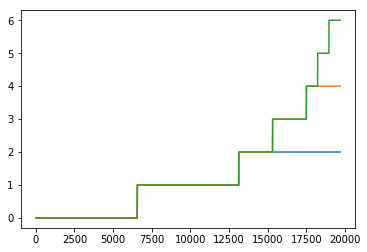

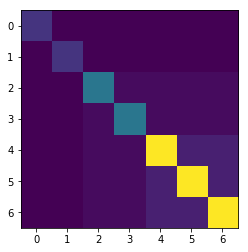

In [104]:
omega = D_actual.construct_full_block_params()
for part in D_actual.get_partition_all():
    plt.plot(part)

plt.figure()
plt.imshow(omega)

In [81]:
g = D_actual.generateNetworkExactProb()

In [32]:
A=D_actual.to_scipy_sparse_matrix(g)

[1, 2, 3]

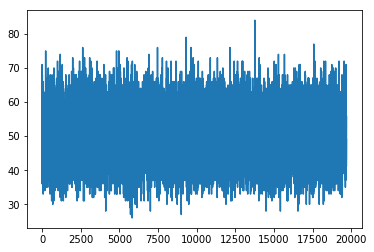

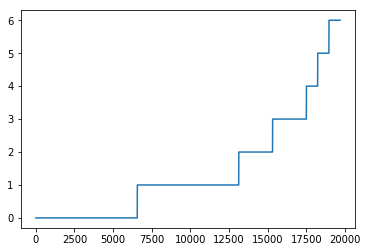

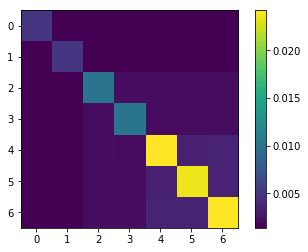

In [107]:
import helperfunctions
pvec = D_actual.get_partition_at_level(-1)[0]
plt.figure()
plt.plot(A.sum(axis=1))
plt.figure()
plt.plot(pvec)

H = helperfunctions.create_partition_matrix_from_vector(pvec)
Omegahat = H.T*A*H / (H.T.sum(axis=1)* H.T.sum(axis=1).T)
plt.figure()
plt.imshow(Omegahat.A)
plt.colorbar()

D_actual.node[0]['children']